In [1]:
from time import strftime, gmtime, localtime

import pandas as pd
import numpy as np

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
#conda install -c conda-forge xgboost
import xgboost

import statsmodels.api as sm

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
#sns.set(rc={'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'patch.linewidth': 1})
%matplotlib inline

random_state = 42
np.random.seed(random_state)

print(strftime("Starting: %Y-%m-%d %H:%M:%S", localtime()))



Starting: 2018-10-14 23:29:45


In [2]:
data = pd.read_pickle("data.pickle")
data.head()

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RFRATE,SP500TR,RET,RELRET
0,1963-01-31,T,10401,32,0.613024,-0.131919,0.99,99.788054,0.012821,2.87,0.049128,0.036403,-0.012725
1,1963-01-31,GM,12079,23,0.408998,0.030786,0.99,99.788054,0.012821,2.87,0.049128,0.079570,0.030442
2,1963-01-31,XOM,11850,30,0.686189,0.163202,0.99,99.788054,0.012821,2.87,0.049128,0.006303,-0.042825
3,1963-01-31,DD,11703,14,0.336631,0.115541,0.99,99.788054,0.012821,2.87,0.049128,0.026096,-0.023032
4,1963-01-31,IBM,12490,34,0.126757,-0.306857,0.99,99.788054,0.012821,2.87,0.049128,0.086538,0.037410


In [3]:
X = data[["VALUE","MOMENTUM","MONETARYPOLICY","GROWTH","INFLATION"]].values
#X = data[["VALUE", "MOMENTUM"]].values
X = np.hstack((X, pd.get_dummies(data["INDUSTRY"]).values))
y = data["RET"].values
X.shape, y.shape

((581095, 54), (581095,))

In [4]:
# create train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

Train R-squared: 0.001959


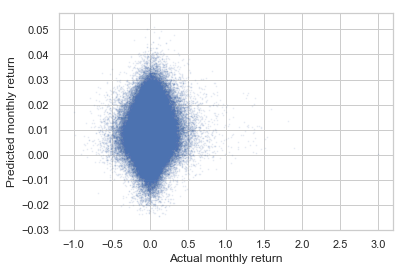

In [5]:
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Fitted vs. Actual
y_train_pred = model.predict(X_train)
print ("Train R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
plt.xlabel("Actual monthly return");
plt.ylabel("Predicted monthly return");

In [6]:
# your predictions are bad and you should feel bad
# instead of predicting monthly returns, do 3-month returns


In [7]:
# this is possibly not the most efficient way to calculate 3-month returns

def group_by_permno(df, permno, col="RET"):
    retdf = df.loc[df['PERMNO']==permno]
    retdf["TPLUS1"] = retdf["DATETIME"].shift(-1)
    retdf[col + "1"] = retdf[col].shift(-1)
    retdf["TPLUS2"] = retdf["DATETIME"].shift(-2)
    retdf[col + "2"] = retdf[col].shift(-2)
    return retdf
group_by_permno(data, 12490, col="RELRET")


/home/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RFRATE,SP500TR,RET,RELRET,TPLUS1,RELRET1,TPLUS2,RELRET2
4,1963-01-31,IBM,12490,34,0.126757,-0.306857,0.99,99.788054,0.012821,2.87,0.049128,0.086538,0.037410,1963-02-28,-0.025425,1963-03-31,0.017694
405,1963-02-28,IBM,12490,34,0.126757,-0.275333,0.92,99.939763,0.009615,2.91,-0.028852,-0.054277,-0.025425,1963-03-31,0.017694,1963-04-30,0.053024
821,1963-03-31,IBM,12490,34,0.126757,-0.206399,1.00,100.074720,0.012821,2.92,0.035464,0.053158,0.017694,1963-04-30,0.053024,1963-05-31,0.016940
1231,1963-04-30,IBM,12490,34,0.126757,-0.243486,1.04,100.184328,0.012780,2.89,0.048520,0.101544,0.053024,1963-05-31,0.016940,1963-06-30,-0.065711
1640,1963-05-31,IBM,12490,34,0.126757,-0.065072,1.07,100.262197,0.012780,2.90,0.014327,0.031267,0.016940,1963-06-30,-0.065711,1963-07-31,-0.000551
2043,1963-06-30,IBM,12490,34,0.126757,0.188960,1.00,100.296671,0.009554,2.93,-0.020198,-0.085909,-0.065711,1963-07-31,-0.000551,1963-08-31,-0.022857
2462,1963-07-31,IBM,12490,34,0.114340,0.418594,1.00,100.286099,0.012739,2.99,-0.003460,-0.004011,-0.000551,1963-08-31,-0.022857,1963-09-30,0.027336
2897,1963-08-31,IBM,12490,34,0.114340,0.136728,0.84,100.247021,0.012739,3.18,0.048749,0.025892,-0.022857,1963-09-30,0.027336,1963-10-31,0.060702
3346,1963-09-30,IBM,12490,34,0.114340,0.103650,0.68,100.204064,0.012698,3.32,-0.011035,0.016301,0.027336,1963-10-31,0.060702,1963-11-30,-0.004643
3809,1963-10-31,IBM,12490,34,0.114340,0.269149,0.70,100.177771,0.012698,3.38,0.032218,0.092920,0.060702,1963-11-30,-0.004643,1963-12-31,0.020379


In [8]:
# YOU MUST DO THIS BEFORE CULLING OUTLIERS
# YOU ALSO MUST CHECK FOR GAPS IN DATES

unique_permno = sorted(set(data["PERMNO"].values))

max_unique = len(unique_permno)

dflist = []
for i, permno in enumerate(unique_permno):
    if i%100==1:
        print("%s Grouping %d : item %d of %d" % (strftime("%Y-%m-%d %H:%M:%S", localtime()), permno, i-1, max_unique))
    dflist.append(group_by_permno(data, permno, col="RET"))
print("concatenating")
datanew = pd.concat(dflist)
datanew.head()


/home/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

2018-10-14 23:31:14 Grouping 10026 : item 0 of 5105
2018-10-14 23:31:46 Grouping 10890 : item 100 of 5105
2018-10-14 23:32:19 Grouping 11850 : item 200 of 5105
2018-10-14 23:32:52 Grouping 12796 : item 300 of 5105
2018-10-14 23:33:25 Grouping 13711 : item 400 of 5105
2018-10-14 23:33:58 Grouping 14573 : item 500 of 5105
2018-10-14 23:34:31 Grouping 15560 : item 600 of 5105
2018-10-14 23:35:05 Grouping 17815 : item 700 of 5105
2018-10-14 23:35:39 Grouping 20095 : item 800 of 5105
2018-10-14 23:36:14 Grouping 22243 : item 900 of 5105
2018-10-14 23:36:48 Grouping 24046 : item 1000 of 5105
2018-10-14 23:37:25 Grouping 25689 : item 1100 of 5105
2018-10-14 23:38:00 Grouping 27676 : item 1200 of 5105
2018-10-14 23:38:36 Grouping 31131 : item 1300 of 5105
2018-10-14 23:39:13 Grouping 35370 : item 1400 of 5105
2018-10-14 23:39:49 Grouping 39045 : item 1500 of 5105
2018-10-14 23:40:26 Grouping 41929 : item 1600 of 5105
2018-10-14 23:41:03 Grouping 44768 : item 1700 of 5105
2018-10-14 23:41:41 Gr

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RFRATE,SP500TR,RET,RELRET,TPLUS1,RET1,TPLUS2,RET2
325,1963-01-31,ACF,10006,25,1.443624,0.126256,0.99,99.788054,0.012821,2.87,0.049128,0.047002,-0.002126,1963-02-28,0.038700,1963-03-31,-0.009009
729,1963-02-28,ACF,10006,25,1.443624,0.096012,0.92,99.939763,0.009615,2.91,-0.028852,0.038700,0.067552,1963-03-31,-0.009009,1963-04-30,0.084848
1137,1963-03-31,ACF,10006,25,1.443624,0.133934,1.00,100.074720,0.012821,2.92,0.035464,-0.009009,-0.044473,1963-04-30,0.084848,1963-05-31,0.091620
1553,1963-04-30,ACF,10006,25,1.443624,0.268752,1.04,100.184328,0.012780,2.89,0.048520,0.084848,0.036328,1963-05-31,0.091620,1963-06-30,-0.001289
1957,1963-05-31,ACF,10006,25,1.443624,0.189535,1.07,100.262197,0.012780,2.90,0.014327,0.091620,0.077293,1963-06-30,-0.001289,1963-07-31,-0.045161


In [10]:
# relative returns

dflist = []
for i, permno in enumerate(unique_permno):
    if i%100==1:
        print("%s Grouping %d : item %d of %d" % (strftime("%Y-%m-%d %H:%M:%S", localtime()), permno, i-1, max_unique))
    dflist.append(group_by_permno(datanew, permno, col="RELRET"))
print("concatenating")
datanew = pd.concat(dflist)

datanew.head()


/home/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

2018-10-15 00:11:07 Grouping 10026 : item 0 of 5105
2018-10-15 00:11:39 Grouping 10890 : item 100 of 5105
2018-10-15 00:12:12 Grouping 11850 : item 200 of 5105
2018-10-15 00:12:45 Grouping 12796 : item 300 of 5105
2018-10-15 00:13:18 Grouping 13711 : item 400 of 5105
2018-10-15 00:13:52 Grouping 14573 : item 500 of 5105
2018-10-15 00:14:26 Grouping 15560 : item 600 of 5105
2018-10-15 00:15:01 Grouping 17815 : item 700 of 5105
2018-10-15 00:15:35 Grouping 20095 : item 800 of 5105
2018-10-15 00:16:10 Grouping 22243 : item 900 of 5105
2018-10-15 00:16:45 Grouping 24046 : item 1000 of 5105
2018-10-15 00:17:21 Grouping 25689 : item 1100 of 5105
2018-10-15 00:17:56 Grouping 27676 : item 1200 of 5105
2018-10-15 00:18:33 Grouping 31131 : item 1300 of 5105
2018-10-15 00:19:10 Grouping 35370 : item 1400 of 5105
2018-10-15 00:19:46 Grouping 39045 : item 1500 of 5105
2018-10-15 00:20:23 Grouping 41929 : item 1600 of 5105
2018-10-15 00:21:00 Grouping 44768 : item 1700 of 5105
2018-10-15 00:21:37 Gr

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RFRATE,SP500TR,RET,RELRET,TPLUS1,RET1,TPLUS2,RET2,RELRET1,RELRET2
325,1963-01-31,ACF,10006,25,1.443624,0.126256,0.99,99.788054,0.012821,2.87,0.049128,0.047002,-0.002126,1963-02-28,0.038700,1963-03-31,-0.009009,0.067552,-0.044473
729,1963-02-28,ACF,10006,25,1.443624,0.096012,0.92,99.939763,0.009615,2.91,-0.028852,0.038700,0.067552,1963-03-31,-0.009009,1963-04-30,0.084848,-0.044473,0.036328
1137,1963-03-31,ACF,10006,25,1.443624,0.133934,1.00,100.074720,0.012821,2.92,0.035464,-0.009009,-0.044473,1963-04-30,0.084848,1963-05-31,0.091620,0.036328,0.077293
1553,1963-04-30,ACF,10006,25,1.443624,0.268752,1.04,100.184328,0.012780,2.89,0.048520,0.084848,0.036328,1963-05-31,0.091620,1963-06-30,-0.001289,0.077293,0.018909
1957,1963-05-31,ACF,10006,25,1.443624,0.189535,1.07,100.262197,0.012780,2.90,0.014327,0.091620,0.077293,1963-06-30,-0.001289,1963-07-31,-0.045161,0.018909,-0.041701


In [11]:
print(datanew.shape)
datanew = datanew.dropna()
print(datanew.shape)


(581095, 19)
(571023, 19)


In [12]:
datanew["RET3"]= (1 + datanew["RET"]) * (1 + datanew["RET1"]) * (1 + datanew["RET2"]) -1
datanew["RELRET3"]= (1 + datanew["RELRET"]) * (1 + datanew["RELRET1"]) * (1 + datanew["RELRET2"]) -1
datanew.head()


,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RFRATE,...,RET,RELRET,TPLUS1,RET1,TPLUS2,RET2,RELRET1,RELRET2,RET3,RELRET3
325,1963-01-31,ACF,10006,25,1.443624,0.126256,0.99,99.788054,0.012821,2.87,...,0.047002,-0.002126,1963-02-28,0.038700,1963-03-31,-0.009009,0.067552,-0.044473,0.077724,0.017905
729,1963-02-28,ACF,10006,25,1.443624,0.096012,0.92,99.939763,0.009615,2.91,...,0.038700,0.067552,1963-03-31,-0.009009,1963-04-30,0.084848,-0.044473,0.036328,0.116680,0.057131
1137,1963-03-31,ACF,10006,25,1.443624,0.133934,1.00,100.074720,0.012821,2.92,...,-0.009009,-0.044473,1963-04-30,0.084848,1963-05-31,0.091620,0.036328,0.077293,0.173573,0.066778
1553,1963-04-30,ACF,10006,25,1.443624,0.268752,1.04,100.184328,0.012780,2.89,...,0.084848,0.036328,1963-05-31,0.091620,1963-06-30,-0.001289,0.077293,0.018909,0.182715,0.137539
1957,1963-05-31,ACF,10006,25,1.443624,0.189535,1.07,100.262197,0.012780,2.90,...,0.091620,0.077293,1963-06-30,-0.001289,1963-07-31,-0.045161,0.018909,-0.041701,0.040978,0.051890


In [13]:
data = datanew[['DATETIME', 'SYMBOL', 'PERMNO', 'INDUSTRY', 
                'VALUE', 'MOMENTUM','MONETARYPOLICY', 'GROWTH', 'INFLATION', "RFRATE",
                'RET', 'RET3', 'SP500TR', 'RELRET', 'RELRET3']]
data.to_pickle("data3.pickle")
data.head()

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RFRATE,RET,RET3,SP500TR,RELRET,RELRET3
325,1963-01-31,ACF,10006,25,1.443624,0.126256,0.99,99.788054,0.012821,2.87,0.047002,0.077724,0.049128,-0.002126,0.017905
729,1963-02-28,ACF,10006,25,1.443624,0.096012,0.92,99.939763,0.009615,2.91,0.038700,0.116680,-0.028852,0.067552,0.057131
1137,1963-03-31,ACF,10006,25,1.443624,0.133934,1.00,100.074720,0.012821,2.92,-0.009009,0.173573,0.035464,-0.044473,0.066778
1553,1963-04-30,ACF,10006,25,1.443624,0.268752,1.04,100.184328,0.012780,2.89,0.084848,0.182715,0.048520,0.036328,0.137539
1957,1963-05-31,ACF,10006,25,1.443624,0.189535,1.07,100.262197,0.012780,2.90,0.091620,0.040978,0.014327,0.077293,0.051890


In [14]:
data = pd.read_pickle("data3.pickle")
data.sort_values("DATETIME")
data.reset_index(inplace=True)
data.head()

,index,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RFRATE,RET,RET3,SP500TR,RELRET,RELRET3
0,325,1963-01-31,ACF,10006,25,1.443624,0.126256,0.99,99.788054,0.012821,2.87,0.047002,0.077724,0.049128,-0.002126,0.017905
1,729,1963-02-28,ACF,10006,25,1.443624,0.096012,0.92,99.939763,0.009615,2.91,0.038700,0.116680,-0.028852,0.067552,0.057131
2,1137,1963-03-31,ACF,10006,25,1.443624,0.133934,1.00,100.074720,0.012821,2.92,-0.009009,0.173573,0.035464,-0.044473,0.066778
3,1553,1963-04-30,ACF,10006,25,1.443624,0.268752,1.04,100.184328,0.012780,2.89,0.084848,0.182715,0.048520,0.036328,0.137539
4,1957,1963-05-31,ACF,10006,25,1.443624,0.189535,1.07,100.262197,0.012780,2.90,0.091620,0.040978,0.014327,0.077293,0.051890


In [15]:
# create X and y numpy arrays

X = data[["VALUE","MOMENTUM","MONETARYPOLICY","GROWTH","INFLATION"]].values
#X = data[["VALUE", "MOMENTUM"]].values
X = np.hstack((X, pd.get_dummies(data["INDUSTRY"]).values))
# use 3-month returns
y = data["RET3"].values
X.shape, y.shape

((571023, 54), (571023,))

In [16]:
# split and scale for regularization 
# note that holding out random rows is problematic for time series
# use walkforward cross-validation 
# even then resulting metrics should be viewed with suspicion

# for this exercise use last test_index rows for holdout

# split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

xval_index = len(data.loc[data["DATETIME"] > pd.to_datetime("2013-01-01")])
test_index = len(data.loc[data["DATETIME"] > pd.to_datetime("2016-01-01")])

total_obs, predictors = X.shape
train_end = total_obs-xval_index
xval_end =  total_obs-test_index

train_indexes      = list(range(train_end))
train_xval_indexes = list(range(xval_end))
xval_indexes       = list(range(train_end,xval_end))
test_indexes       = list(range(xval_end, total_obs))

X_train = X[train_indexes]
y_train = y[train_indexes]

X_train_xval = X[train_xval_indexes]
y_train_xval = y[train_xval_indexes]

X_xval = X[xval_indexes]
y_xval = y[xval_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

print(total_obs)
print(X_train.shape)
print(X_xval.shape)
print(X_test.shape)
print(X_train_xval.shape)

# scale
scaler = preprocessing.StandardScaler()
# train scaler on training data
X_train_scaled = scaler.fit_transform(X_train)
# transform only!
X_train_xval_scaled = scaler.transform(X_train_xval)
X_xval_scaled = scaler.transform(X_xval)
X_test_scaled = scaler.transform(X_test)




571023
(512345, 54)
(36458, 54)
(22220, 54)
(548803, 54)


In [17]:
print(X_train_scaled.shape)
print(sm.add_constant(X_train_scaled).shape)

print(X_xval_scaled.shape)
print(sm.add_constant(X_xval_scaled).shape)

#WAT

(512345, 54)
(512345, 55)
(36458, 54)
(36458, 54)


In [18]:
rows = X_train_scaled.shape[0]
z = np.ones((rows,1))
X_train_scaled_constant = np.hstack((z, X_train_scaled))
print(X_train_scaled_constant.shape)

rows = X_xval_scaled.shape[0]
z = np.ones((rows,1))
X_xval_scaled_constant = np.hstack((z, X_xval_scaled))
print(X_xval_scaled_constant.shape)


(512345, 55)
(36458, 55)


In [19]:
#X_train_scaled_const = sm.add_constant(X_train_scaled)
#X_xval_scaled_const = sm.add_constant(X_xval_scaled)
print(X_xval_scaled_constant.shape)
model = sm.OLS(y_train, X_train_scaled_constant)
results = model.fit()

y_train_predict = results.predict(X_train_scaled_constant).reshape(y_train.shape)
residuals = y_train - y_train_predict

print("Prediction mean: %.6f" % np.mean(y_train_predict))
print("Prediction SD:   %.6f" % np.mean(np.std(y_train_predict)))

results.summary()

(36458, 55)
Prediction mean: 0.029382
Prediction SD:   0.020550


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     135.6
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        01:09:43   Log-Likelihood:             1.7020e+05
No. Observations:              512345   AIC:                        -3.403e+05
Df Residuals:                  512291   BIC:                        -3.397e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0294      0.000    106.961      0.000       0.029       0.030
x1             0.0087      0.000     29.572      0.000       0.008       0.009
x2             0.0060      0.000     24.097      0.000       0.005       0.006
x3             0.0039      0.000     15.045      0.000       0.003       0.004
x4            -0.0175      0.000    -67.223      0.000      -0.018      -0.017
x5            -0.0016      0.000     -5.771      0.000      -0.002      -0.001
x6         -1.712e+08   8.74e+09     -0.020      0.984   -1.73e+10     1.7e+10
x7         -1.132e+08   5.78e+09     -0.020      0.984   -1.14e+10    1.12e+10
x8         -4.633e+08   2.36e+10     -0.020      0.984   -4.68e+10    4.59e+10
x9         -2.736e+08    1.4e+10     -0.020      0.984   -2.76e+10    2.71e+10
x10        -2.433e+08   1.24e+10     -0.020      0.984   -2.46e+10    2.41e+10
x11        -1.565e+08   7.99e+09     -0.020      0.984   -1.58e+10    1.55e+10
x12        -2.169e+08   1.11e+10     -0.020      0.984   -2.19e+10    2.15e+10
x13        -2.377e+08   1.21e+10     -0.020      0.984    -2.4e+10    2.35e+10
x14        -3.255e+08   1.66e+10     -0.020      0.984   -3.29e+10    3.22e+10
x15        -4.542e+08   2.32e+10     -0.020      0.984   -4.59e+10     4.5e+10
x16        -2.565e+08   1.31e+10     -0.020      0.984   -2.59e+10    2.54e+10
x17        -3.198e+08   1.63e+10     -0.020      0.984   -3.23e+10    3.17e+10
x18        -3.886e+08   1.98e+10     -0.020      0.984   -3.93e+10    3.85e+10
x19        -5.471e+08   2.79e+10     -0.020      0.984   -5.53e+10    5.42e+10
x20        -5.481e+08    2.8e+10     -0.020      0.984   -5.54e+10    5.43e+10
x21        -2.151e+08    1.1e+10     -0.020      0.984   -2.17e+10    2.13e+10
x22        -1.865e+08   9.52e+09     -0.020      0.984   -1.88e+10    1.85e+10
x23        -4.372e+08   2.23e+10     -0.020      0.984   -4.42e+10    4.33e+10
x24        -2.491e+08   1.27e+10     -0.020      0.984   -2.52e+10    2.47e+10
x25        -4.261e+08   2.17e+10     -0.020      0.984    -4.3e+10    4.22e+10
x26        -1.663e+08   8.49e+09     -0.020      0.984   -1.68e+10    1.65e+10
x27        -5.695e+08   2.91e+10     -0.020      0.984   -5.75e+10    5.64e+10
x28        -2.596e+08   1.33e+10     -0.020      0.984   -2.62e+10    2.57e+10
x29        -4.557e+08   2.33e+10     -0.020      0.984    -4.6e+10    4.51e+10
x30        -2.406e+08   1.23e+10     -0.020      0.984   -2.43e+10    2.38e+10
x31        -1.049e+08   5.36e+09     -0.020      0.984   -1.06e+10    1.04e+10
x32        -2.383e+08   1.22e+10     -0.020      0.984   -2.41e+10    2.36e+10
x33        -2.562e+08   1.31e+10     -0.020      0.984   -2.59e+10    2.54e+10
x34         -3.36e+08   1.71e+10     -0.020      0.984   -3.39e+10    3.33e+10
x35        -1.177e+08   6.01e+09     -0.020      0.984   -1.19e+10    1.17e+10
x3

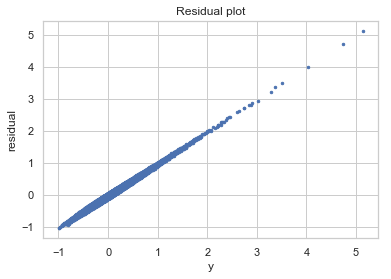

In [20]:
# plot residuals
plt.scatter(y_train, residuals, s=6);
plt.title('Residual plot');
plt.xlabel('y');
plt.ylabel('residual');
# predictions are near 0
# ys have a broad spread
# it's almost like plotting y vs. y

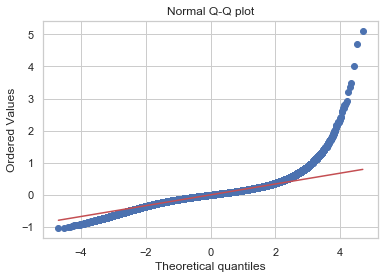

In [21]:
# q-q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

# large outliers


Train R-squared: 0.013830
Xval R-squared: -0.001017


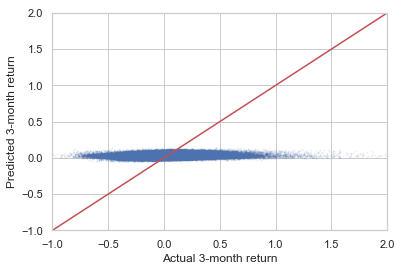

In [22]:
# Fitted vs. Actual
y_train_pred = results.predict(X_train_scaled_constant)
print ("Train R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

# xval R-squared 
y_xval_pred = results.predict(X_xval_scaled_constant)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))

plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
#plt.ylim(-0.05, 0.15) 
plt.ylim(-1, 2) 
plt.xlim(-1, 2) 
fortyfiveline = np.array([-1, 2])

plt.plot(fortyfiveline, fortyfiveline, c='r')
plt.xlabel("Actual 3-month return");
plt.ylabel("Predicted 3-month return");

In [23]:
# large drop in xval R-squared in xval v. train is indicative of overfitting


In [24]:
# create CV folds 
# this will have serial correlation issue
# use walkforward crossvalidation instead

# kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)


Train R-squared: 0.013833
Xval R-squared: -0.000988


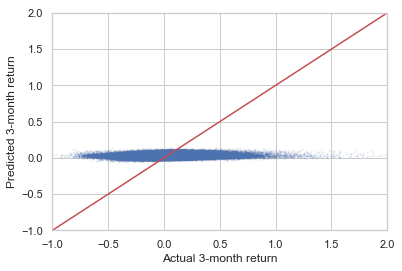

In [25]:
# do same with sklearn instead of statsmodels
model = LinearRegression()

#scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring="r2")
#print(scores)
#print("Linear Reg Mean Score: ", np.mean(scores))

# Build the model
model.fit(X_train_scaled, y_train)

# Fitted vs. Actual
y_train_pred = model.predict(X_train_scaled)
print ("Train R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

y_xval_pred = model.predict(X_xval_scaled)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))

plt.ylim(-1, 2) 
plt.xlim(-1, 2) 
fortyfiveline = np.array([-1, 2])

plt.plot(fortyfiveline, fortyfiveline, c='r')
plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
plt.xlabel("Actual 3-month return");
plt.ylabel("Predicted 3-month return");

In [26]:
# same result as statsmodels so that's good

In [27]:
def build_grid_search_est(model, X, y, params, cv):
    
    #n_jobs = 4 because 8 or -1 maxes out memory and dies
    grid_est = GridSearchCV(model, param_grid=params, cv=cv, scoring="r2", n_jobs=4)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        tempdf = df.groupby(['param_' + param]).mean().reset_index()
        plt.semilogx(tempdf['param_' + param], tempdf.mean_test_score)
        plt.show()
    return grid_est

Lasso Model:
alphas to test
[1.00000000e-06 3.16227766e-06 1.00000000e-05 3.16227766e-05
 1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00]


/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


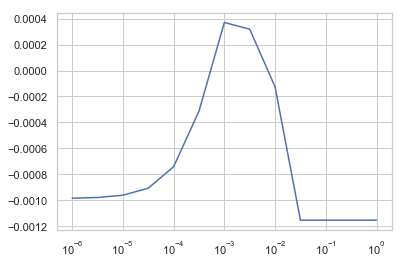

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
6,1.843181,0.0,0.007103,0.0,0.001,{'alpha': 0.001},0.000371,0.000371,0.000000e+00,1,0.012840,0.012840,0.0
7,2.040475,0.0,0.006591,0.0,0.00316228,{'alpha': 0.0031622776601683794},0.000319,0.000319,0.000000e+00,2,0.011121,0.011121,0.0
8,1.867520,0.0,0.006683,0.0,0.01,{'alpha': 0.01},-0.000127,-0.000127,0.000000e+00,3,0.006433,0.006433,0.0
5,2.150573,0.0,0.005917,0.0,0.000316228,{'alpha': 0.00031622776601683794},-0.000313,-0.000313,0.000000e+00,4,0.013668,0.013668,0.0
4,2.417296,0.0,0.005800,0.0,0.0001,{'alpha': 0.0001},-0.000743,-0.000743,0.000000e+00,5,0.013814,0.013814,0.0
3,5.409133,0.0,0.006130,0.0,3.16228e-05,{'alpha': 3.1622776601683795e-05},-0.000909,-0.000909,1.084202e-19,6,0.013831,0.013831,0.0
2,15.842636,0.0,0.006787,0.0,1e-05,{'alpha': 1e-05},-0.000963,-0.000963,0.000000e+00,7,0.013832,0.013832,0.0
1,40.596194,0.0,0.007108,0.0,3.16228e-06,{'alpha': 3.162277660168379e-06},-0.000980,-0.000980,0.000000e+00,8,0.013833,0.013833,0.0
0,114.018528,0.0,0.007679,0.0,1e-06,{'alpha': 1e-06},-0.000986,-0.000986,0.000000e+00,9,0.013833,0.013833,0.0
9,1.701753,0.0,0.006276,0.0,0.0316228,{'alpha': 0.03162277660168379},-0.001155,-0.001155,0.000000e+00,10,0.000000,0.000000,0.0


In [28]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-6, 0, 13)
}

print("alphas to test")
print(params['alpha'])

grid_est = build_grid_search_est(Lasso(), 
                                 X_train_xval_scaled, y_train_xval, 
                                 params, 
                                 cv=[(train_indexes, xval_indexes)])

print(grid_est.best_params_)
print(grid_est.best_estimator_)

pd.DataFrame(grid_est.cv_results_).sort_values("mean_test_score", ascending=False)


Train R-squared: 0.012840


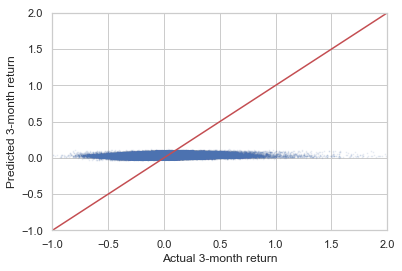

Xval R-squared: 0.000371
End: 2018-10-15 01:36:56


In [41]:
# rerun best estimator on full dataset

def run_one_model(model, X_train_scaled, y_train):

    # Build the model
    
    model.fit(X_train_scaled, y_train)

    # Evaluate
    y_train_pred = model.predict(X_train_scaled)
    print ("Train R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])

    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");
    plt.show();
    
    return model

best_lasso_alpha = 0.001
model=run_one_model(Lasso(alpha=best_lasso_alpha, random_state=random_state),
                    X_train_scaled, y_train)
y_xval_pred = model.predict(X_xval_scaled)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    


Ridge Model:
alphas to test
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05 3.16227766e+05 1.00000000e+06 3.16227766e+06
 1.00000000e+07 3.16227766e+07 1.00000000e+08]


/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


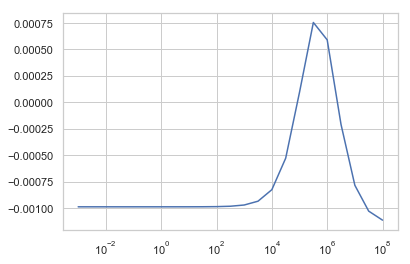

{'alpha': 316227.7660168379}
Ridge(alpha=316227.7660168379, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
17,0.752424,0.0,0.005921,0.0,316228,{'alpha': 316227.7660168379},0.000754,0.000754,0.0,1,0.011587,0.011587,0.0
18,0.751389,0.0,0.006162,0.0,1e+06,{'alpha': 1000000.0},0.000590,0.000590,0.0,2,0.007662,0.007662,0.0
16,0.776262,0.0,0.005617,0.0,100000,{'alpha': 100000.0},0.000095,0.000095,0.0,3,0.013359,0.013359,0.0
19,0.751467,0.0,0.005893,0.0,3.16228e+06,{'alpha': 3162277.6601683795},-0.000210,-0.000210,0.0,4,0.003602,0.003602,0.0
15,0.765774,0.0,0.005712,0.0,31622.8,{'alpha': 31622.776601683792},-0.000529,-0.000529,0.0,5,0.013766,0.013766,0.0
20,0.748599,0.0,0.005920,0.0,1e+07,{'alpha': 10000000.0},-0.000785,-0.000785,0.0,6,0.001340,0.001340,0.0
14,0.779005,0.0,0.005880,0.0,10000,{'alpha': 10000.0},-0.000827,-0.000827,0.0,7,0.013825,0.013825,0.0
13,0.765940,0.0,0.005914,0.0,3162.28,{'alpha': 3162.2776601683795},-0.000935,-0.000935,0.0,8,0.013832,0.013832,0.0
12,0.771557,0.0,0.005678,0.0,1000,{'alpha': 1000.0},-0.000971,-0.000971,0.0,9,0.013833,0.013833,0.0
11,0.770972,0.0,0.005568,0.0,316.228,{'alpha': 316.22776601683796},-0.000983,-0.000983,0.0,10,0.013833,0.013833,0.0


In [30]:
print("Ridge Model:")

params = {
    "alpha": np.logspace(-3, 8, (8+3)*2+1)
}

print("alphas to test")
print(params['alpha'])

grid_est = build_grid_search_est(Ridge(), 
                                 X_train_xval_scaled, y_train_xval, 
                                 params, 
                                 cv=[(train_indexes, xval_indexes)])

print(grid_est.best_params_)
print(grid_est.best_estimator_)

pd.DataFrame(grid_est.cv_results_).sort_values("mean_test_score", ascending=False)


Train R-squared: 0.011587


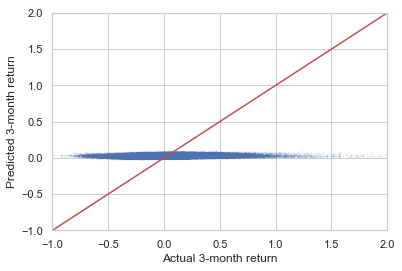

Xval R-squared: 0.000754
End: 2018-10-15 01:38:39


In [43]:
# do the best one on full train

best_ridge_alpha = 316227.7660168379
model = run_one_model(Ridge(alpha=best_ridge_alpha, random_state=random_state),
              X_train_scaled, y_train)

y_xval_pred = model.predict(X_xval_scaled)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    


Elastic Net Grid Search
{'alpha': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]), 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecat

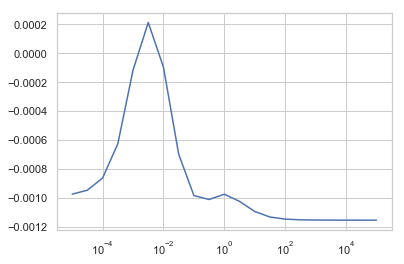

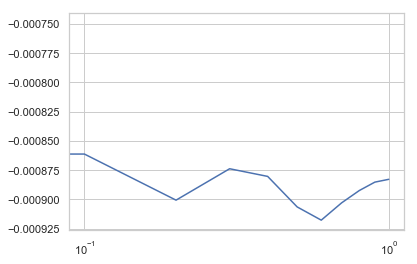

{'alpha': 1.0, 'l1_ratio': 0.0}
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
110,136.147347,0.0,0.007324,0.0,1,0,"{'alpha': 1.0, 'l1_ratio': 0.0}",0.000816,0.000816,0.000000e+00,1,0.010157,0.010157,0.0
68,1.843380,0.0,0.005996,0.0,0.01,0.2,"{'alpha': 0.01, 'l1_ratio': 0.2}",0.000493,0.000493,0.000000e+00,2,0.011940,0.011940,0.0
61,1.776067,0.0,0.005934,0.0,0.00316228,0.6,"{'alpha': 0.0031622776601683794, 'l1_ratio': 0...",0.000477,0.000477,5.421011e-20,3,0.012031,0.012031,0.0
60,1.887894,0.0,0.005868,0.0,0.00316228,0.5,"{'alpha': 0.0031622776601683794, 'l1_ratio': 0.5}",0.000477,0.000477,5.421011e-20,4,0.012250,0.012250,0.0
62,1.835016,0.0,0.005875,0.0,0.00316228,0.7,"{'alpha': 0.0031622776601683794, 'l1_ratio': 0...",0.000466,0.000466,0.000000e+00,5,0.011838,0.011838,0.0
63,1.772814,0.0,0.006277,0.0,0.00316228,0.8,"{'alpha': 0.0031622776601683794, 'l1_ratio': 0.8}",0.000437,0.000437,0.000000e+00,6,0.011627,0.011627,0.0
59,1.909970,0.0,0.006037,0.0,0.00316228,0.4,"{'alpha': 0.0031622776601683794, 'l1_ratio': 0.4}",0.000426,0.000426,0.000000e+00,7,0.012550,0.012550,0.0
99,135.050446,0.0,0.007113,0.0,0.316228,0,"{'alpha': 0.31622776601683794, 'l1_ratio': 0.0}",0.000415,0.000415,0.000000e+00,8,0.012867,0.012867,0.0
67,2.028553,0.0,0.006439,0.0,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.000407,0.000407,0.000000e+00,9,0.012815,0.012815,0.0
64,1.806271,0.0,0.005851,0.0,0.00316228,0.9,"{'alpha': 0.0031622776601683794, 'l1_ratio': 0.9}",0.000388,0.000388,0.000000e+00,10,0.011388,0.011388,0.0


In [32]:
print("Elastic Net Grid Search")
params = {
    "alpha": np.logspace(-5, 5, 21),
    "l1_ratio": np.linspace(0.0, 1.0, 11)
}

print(params)

grid_est = build_grid_search_est(ElasticNet(), 
                                 X_train_xval_scaled, 
                                 y_train_xval, 
                                 params, cv=[(train_indexes, xval_indexes)])


print(grid_est.best_params_)
print(grid_est.best_estimator_)

pd.DataFrame(grid_est.cv_results_).sort_values("mean_test_score", ascending=False)


/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train R-squared: 0.010157


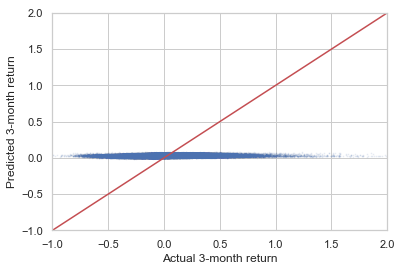

Xval R-squared: 0.000816
2018-10-15 01:40:53


In [44]:
best_elasticnet_alpha = 1.0
best_elasticnet_ratio = 0.0
# should be same as ridge

model = run_one_model(ElasticNet(alpha=best_elasticnet_alpha, l1_ratio=best_elasticnet_ratio, random_state=random_state),
              X_train_scaled, y_train)

y_xval_pred = model.predict(X_xval_scaled)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
print(strftime("%Y-%m-%d %H:%M:%S", localtime()))    



In [34]:
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
classifiers=[est for est in all_estimators() if not issubclass(est[1], ClassifierMixin)]

estimators = []
for name, class_ in all_estimators():
    if not issubclass(class_, sklearn.base.ClassifierMixin):
        if hasattr(class_, 'predict'):
            print(class_)
            estimators.append(class_)

<class 'sklearn.linear_model.bayes.ARDRegression'>
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>
<class 'sklearn.cluster.affinity_propagation_.AffinityPropagation'>
<class 'sklearn.ensemble.bagging.BaggingRegressor'>
<class 'sklearn.mixture.bayesian_mixture.BayesianGaussianMixture'>
<class 'sklearn.linear_model.bayes.BayesianRidge'>
<class 'sklearn.cluster.birch.Birch'>
<class 'sklearn.cross_decomposition.cca_.CCA'>
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'>
<class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>
<class 'sklearn.covariance.elliptic_envelope.EllipticEnvelope'>
<class 'sklearn.tree.tree.ExtraTreeRegressor'>
<class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
<class 'sklearn.mixture.gaussian_mixture.GaussianMixture'>
<class 'sklearn.gaussian_process.gpr.GaussianProcessRegressor'>
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
<class 'sklearn.linear_model.hub

In [35]:
# tune Random Forest
# from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = sklearn.ensemble.forest.RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
#                                n_iter = 64, cv = kfold, verbose=2, random_state=42, n_jobs = 4)
# # Fit the random search model
# rf_random.fit(X_train_scaled, y_train)
# rf_random.best_params_


In [45]:
# ones commented out twice didn't work at all, or took very long
# others were OK but not good enough to keep 

estimators = [
     sklearn.linear_model.base.LinearRegression(),
     xgboost.XGBRegressor(n_estimators=400,
                          max_depth=8),
     sklearn.ensemble.forest.RandomForestRegressor(),
#     sklearn.ensemble.forest.ExtraTreesRegressor(),
     sklearn.linear_model.coordinate_descent.Lasso(alpha=best_lasso_alpha, random_state=random_state),
     sklearn.linear_model.ridge.Ridge(alpha=best_ridge_alpha, random_state=random_state),
     sklearn.linear_model.coordinate_descent.ElasticNet(alpha=best_elasticnet_alpha, 
                                                        l1_ratio=best_elasticnet_ratio, 
                                                        random_state=random_state),
#     sklearn.ensemble.bagging.BaggingRegressor(),
#     sklearn.ensemble.gradient_boosting.GradientBoostingRegressor(),
#     #sklearn.ensemble.weight_boosting.AdaBoostRegressor(),
#     sklearn.kernel_ridge.KernelRidge(),
#     sklearn.linear_model.bayes.BayesianRidge(),
#     sklearn.linear_model.huber.HuberRegressor,
#     sklearn.linear_model.least_angle.Lars(),
#     sklearn.linear_model.least_angle.LassoLars(),
#     sklearn.linear_model.least_angle.LassoLarsIC(),
#     sklearn.linear_model.omp.OrthogonalMatchingPursuit(),
#     sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor(),
# #     sklearn.linear_model.ransac.RANSACRegressor,
#     sklearn.linear_model.stochastic_gradient.SGDRegressor(),
# #    sklearn.neighbors.regression.KNeighborsRegressor(),
    sklearn.neural_network.multilayer_perceptron.MLPRegressor(hidden_layer_sizes=(32,8)), 
#     sklearn.svm.classes.LinearSVR(),
# #    sklearn.svm.classes.NuSVR(),
# #    sklearn.svm.classes.SVR(),
]

Start: 2018-10-15 02:42:06
LR
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train R-squared: 0.013833


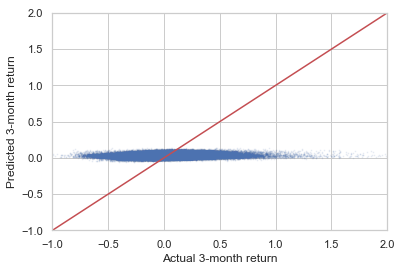

Xval R-squared: -0.000985
End: 2018-10-15 02:42:12
------------------------------------------------------------
Start: 2018-10-15 02:42:13
XGB
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train R-squared: 0.431168


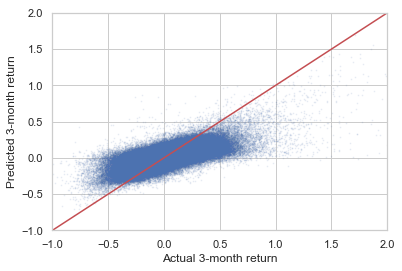

Xval R-squared: 0.269724
End: 2018-10-15 02:53:30
------------------------------------------------------------
Start: 2018-10-15 02:53:49
RF
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Train R-squared: 0.876356


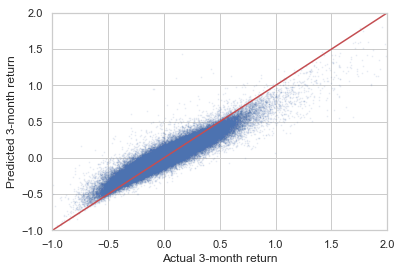

Xval R-squared: 0.214663
End: 2018-10-15 02:55:25
------------------------------------------------------------
Start: 2018-10-15 02:55:26
LASSO
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Train R-squared: 0.012840


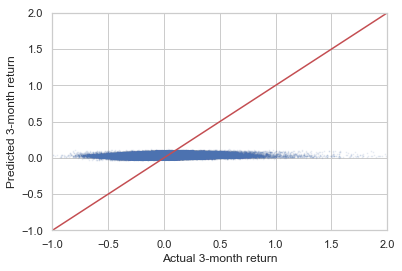

Xval R-squared: 0.000371
End: 2018-10-15 02:55:32
------------------------------------------------------------
Start: 2018-10-15 02:55:32
RIDGE
Ridge(alpha=316227.7660168379, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)
Train R-squared: 0.011587


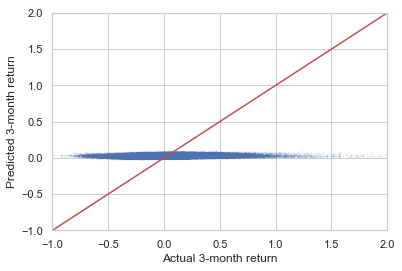

Xval R-squared: 0.000754
End: 2018-10-15 02:55:37
------------------------------------------------------------
Start: 2018-10-15 02:55:37
EL
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)


/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train R-squared: 0.010157


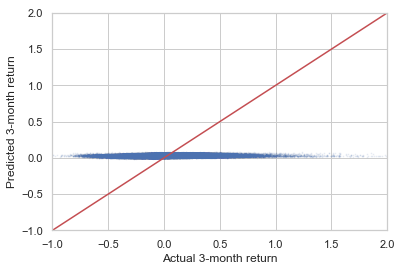

Xval R-squared: 0.000816
End: 2018-10-15 02:57:46
------------------------------------------------------------
Start: 2018-10-15 02:57:46
MLP
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Train R-squared: 0.062814


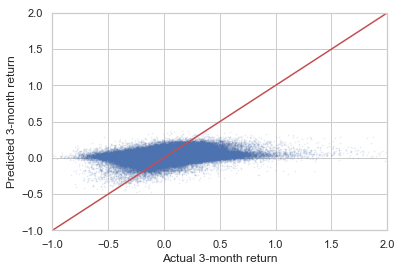

Xval R-squared: 0.025293
End: 2018-10-15 02:58:17
------------------------------------------------------------


In [47]:
# train on entire training set
# predict on entire dataset and save predictions

estimator_names = ["LR", "XGB", "RF", "LASSO", "RIDGE", "EL", "MLP"]

for estname, est in zip(estimator_names, estimators):
    print(strftime("Start: %Y-%m-%d %H:%M:%S", localtime()))    
    print(estname)
    print(est)
    model = run_one_model(est, X_train_scaled, y_train)
    
    y_xval_pred = model.predict(X_xval_scaled)
    print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")
    
    #predict on full X
    data[estname] = model.predict(X)

# save predictions to backtest performance
data.to_pickle("data_forecast.pickle")



Start: 2018-10-15 02:58:19
RF
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


/home/druce/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train R-squared: 0.877361


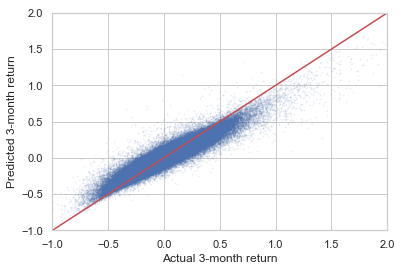

Xval R-squared: 0.222193
End: 2018-10-15 02:59:54
------------------------------------------------------------


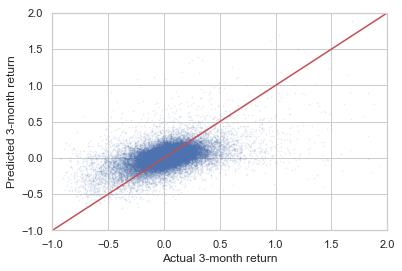

Test R-squared: 0.269946
End: 2018-10-15 02:59:55
------------------------------------------------------------


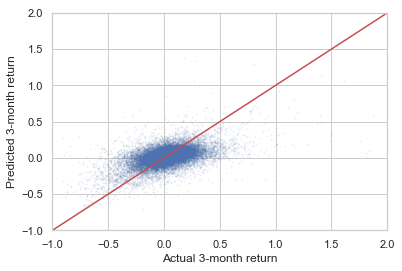

In [48]:
    estname = "RF"
    est = sklearn.ensemble.forest.RandomForestRegressor()
    print(strftime("Start: %Y-%m-%d %H:%M:%S", localtime()))    
    print(estname)
    print(est)
    rf_model = run_one_model(est, X_train_scaled, y_train)
    y_xval_pred = rf_model.predict(X_xval_scaled)

    print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")
    
    #predict on xval
    plt.scatter(y_xval, y_xval_pred, alpha=0.1, s=0.5);
    #plt.ylim(-0.05, 0.15) 
    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])
    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");
    plt.show()
    
    # test
    y_test_pred = rf_model.predict(X_test_scaled)
    print ("Test R-squared: %0.6f" % sklearn.metrics.r2_score(y_test, y_test_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")

    plt.scatter(y_test, y_test_pred, alpha=0.1, s=0.5);
    #plt.ylim(-0.05, 0.15) 
    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])
    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");

Start: 2018-10-15 02:59:55
XGB
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train R-squared: 0.431168


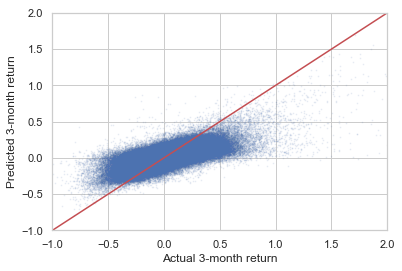

Xval R-squared: 0.269724
End: 2018-10-15 03:11:13
------------------------------------------------------------


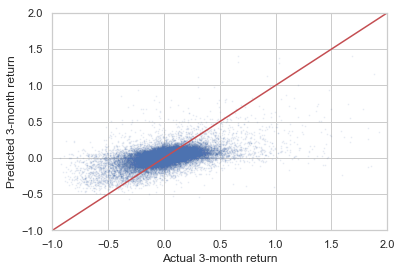

Test R-squared: 0.295535
End: 2018-10-15 03:11:14
------------------------------------------------------------


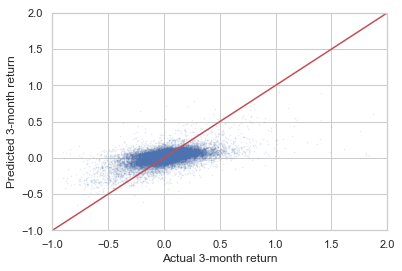

In [49]:
    estname = "XGB"
    est = xgboost.XGBRegressor(n_estimators=400,
                               max_depth=8)
    print(strftime("Start: %Y-%m-%d %H:%M:%S", localtime()))    
    print(estname)
    print(est)
    xgb_model = run_one_model(est, X_train_scaled, y_train)
    
    y_xval_pred = xgb_model.predict(X_xval_scaled)
    
    print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")

    plt.scatter(y_xval, y_xval_pred, alpha=0.1, s=0.5);
    #plt.ylim(-0.05, 0.15) 
    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])

    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");
    
    plt.show()

    y_test_pred = xgb_model.predict(X_test_scaled)
    
    print ("Test R-squared: %0.6f" % sklearn.metrics.r2_score(y_test, y_test_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")

    plt.scatter(y_test, y_test_pred, alpha=0.1, s=0.5);
    #plt.ylim(-0.05, 0.15) 
    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])

    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");

In [50]:
print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))


End: 2018-10-15 03:11:14
